In [5]:
import pandas as pd

In [6]:
!pip install xlrd

Defaulting to user installation because normal site-packages is not writeable


# 1. Importing Data


In [7]:
# Replace 'your_file.xls' with the name of your uploaded file
file_name = 'C:/.Fichiers/.Révision/.Junior/BI & DBM/BI project/Datasets/Raw/Movie & Ratings/Shows and Ratings.csv'

# Load the Excel file
df = pd.read_csv(file_name)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/.Fichiers/.Révision/.Junior/BI & DBM/BI project/Datasets/Raw/Movie & Ratings/Shows and Ratings.csv'

In [4]:
df

,Title,Type_ID,Genre_ID,Year,IMDB_Score,Netflix_Original
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,7.6,False
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003,8.2,False
2,Jarhead,movie,"Biography, Drama, War",2005,7.0,False
3,Unforgiven,movie,"Drama, Western",1992,8.2,False
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004,8.3,False
...,...,...,...,...,...,...
21085,Taylor Swift: Reputation Stadium Tour,NaN,Concert Film,"December 31, 2018",8.4,True
21086,Winter on Fire: Ukraine's Fight for Freedom,NaN,Documentary,"October 9, 2015",8.4,True
21087,Springsteen on Broadway,NaN,One-man show,"December 16, 2018",8.5,True
21088,Emicida: AmarElo - It's All For Yesterday,NaN,Documentary,"December 8, 2020",8.6,True


# 2. Handle Missing Data


In [5]:
# Count NaN values in each column
nan_count = df.isnull().sum()
print("NaN Count in Each Column:")
nan_count

NaN Count in Each Column:


Title                561
Type_ID              584
Genre_ID             301
Year                  21
IMDB_Score          1580
Netflix_Original       0
dtype: int64

In [6]:
# Remove rows with at least one NaN value
df_cleaned = df.dropna(subset=['Title', 'IMDB_Score', 'Year', 'Genre_ID'])

In [7]:
# Count NaN values in each column
nan_count_cleaned = df_cleaned.isnull().sum()
print("NaN Count in Each Column:")
nan_count_cleaned

NaN Count in Each Column:


Title                 0
Type_ID             584
Genre_ID              0
Year                  0
IMDB_Score            0
Netflix_Original      0
dtype: int64

fill missing values of Type ID with undefined

In [8]:
df_cleaned['Type_ID'] = df_cleaned['Type_ID'].fillna('Undefined')
nan_count_cleaned = df_cleaned.isnull().sum()
print("NaN Count in Each Column:")
nan_count_cleaned

NaN Count in Each Column:


C:\Users\jyzel\AppData\Local\Temp\ipykernel_5716\3291550788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Type_ID'] = df_cleaned['Type_ID'].fillna('Undefined')


Title               0
Type_ID             0
Genre_ID            0
Year                0
IMDB_Score          0
Netflix_Original    0
dtype: int64

In [9]:
df_cleaned.columns


Index(['Title', 'Type_ID', 'Genre_ID', 'Year', 'IMDB_Score',
       'Netflix_Original'],
      dtype='object')

# 3. Mapping genres to Genre table

In [10]:
df.dtypes

Title                object
Type_ID              object
Genre_ID             object
Year                 object
IMDB_Score          float64
Netflix_Original       bool
dtype: object

In [11]:
df_cleaned["Year"].dtype == float

False

In [12]:
unique_values = df_cleaned['Netflix_Original'].unique()
unique_values

array([False,  True])

In [13]:
unique_values = df['Netflix_Original'].unique()
print(unique_values)

[False  True]


In [14]:
# Print rows where Netflix_Original is True
netflix_original_rows = df_cleaned[df_cleaned['Netflix_Original'] == True]
print("Rows where Netflix_Original is True:")
netflix_original_rows

Rows where Netflix_Original is True:


,Title,Type_ID,Genre_ID,Year,IMDB_Score,Netflix_Original
20506,Enter the Anime,Undefined,Documentary,"August 5, 2019",2.5,True
20507,Dark Forces,Undefined,Thriller,"August 21, 2020",2.6,True
20508,The App,Undefined,Science fiction/Drama,"December 26, 2019",2.6,True
20509,The Open House,Undefined,Horror thriller,"January 19, 2018",3.2,True
20510,Kaali Khuhi,Undefined,Mystery,"October 30, 2020",3.4,True
...,...,...,...,...,...,...
21085,Taylor Swift: Reputation Stadium Tour,Undefined,Concert Film,"December 31, 2018",8.4,True
21086,Winter on Fire: Ukraine's Fight for Freedom,Undefined,Documentary,"October 9, 2015",8.4,True
21087,Springsteen on Broadway,Undefined,One-man show,"December 16, 2018",8.5,True
21088,Emicida: AmarElo - It's All For Yesterday,Undefined,Documentary,"December 8, 2020",8.6,True


In [15]:
# Print a few rows where Netflix_Original is False
non_netflix_original_rows = df_cleaned[df_cleaned['Netflix_Original'] == False] # Get the first 5 rows
print("\nRows where Netflix_Original is False:")
non_netflix_original_rows


Rows where Netflix_Original is False:


,Title,Type_ID,Genre_ID,Year,IMDB_Score,Netflix_Original
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,7.6,False
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003,8.2,False
2,Jarhead,movie,"Biography, Drama, War",2005,7.0,False
3,Unforgiven,movie,"Drama, Western",1992,8.2,False
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004,8.3,False
...,...,...,...,...,...,...
20478,Nevertheless: The Shapes of Love,tv,Romance,2024,8.0,False
20488,S.E.R.E.G.,tv,Action,2024,3.8,False
20491,The Later Daters,tv,"Reality-TV, Romance",2024,7.0,False
20494,The Kings of Tupelo: A Southern Crime Saga,tv,"Crime, Documentary",2024,6.6,False


In [16]:
genre_df = pd.read_excel('C:/.Fichiers/.Révision/.Junior/BI & DBM/BI project/Datasets/Raw/Movie & Ratings/Genres.xlsx')


In [17]:
genre_df

,Genre ID,Genre
0,1,Action
1,2,Action & Adventure
2,3,Action comedy
3,4,Action thriller
4,6,Action-thriller
...,...,...
101,108,War & Politics
102,109,War drama
103,110,War-Comedy
104,111,Western


In [18]:
# Step 1: Extract the main genre (first genre)
df_cleaned["Main_Genre"] = df_cleaned["Genre_ID"].apply(lambda x: x.split(",")[0].strip())

C:\Users\jyzel\AppData\Local\Temp\ipykernel_5716\1351056982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Main_Genre"] = df_cleaned["Genre_ID"].apply(lambda x: x.split(",")[0].strip())


In [19]:
# Step 2: Map the main genre to the Genre ID
genre_mapping = genre_df.set_index("Genre")["Genre ID"].to_dict()
df_cleaned["Mapped_Genre_ID"] = df_cleaned["Main_Genre"].map(genre_mapping)


C:\Users\jyzel\AppData\Local\Temp\ipykernel_5716\407235835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Mapped_Genre_ID"] = df_cleaned["Main_Genre"].map(genre_mapping)


In [20]:
genre_mapping

{'Action': 1,
 'Action & Adventure': 2,
 'Action comedy': 3,
 'Action thriller': 4,
 'Action-thriller': 6,
 'Adult': 7,
 'Adventure': 8,
 'Adventure-romance': 9,
 'Aftershow': 10,
 'Animated musical comedy': 11,
 'Animation': 12,
 'Anime': 13,
 'Anthology': 14,
 'Biographical': 15,
 'Biography': 16,
 'Biopic': 17,
 'Black comedy': 18,
 'Christian musical': 19,
 'Christmas': 20,
 'Christmas comedy': 21,
 'Christmas musical': 22,
 'Comedy': 23,
 'Comedy horror': 24,
 'Comedy mystery': 25,
 'Comedy-drama': 26,
 'Coming-of-age comedy-drama': 27,
 'Concert Film': 28,
 'Crime': 29,
 'Crime drama': 30,
 'Crime thriller': 31,
 'Dance comedy': 32,
 'Dark comedy': 33,
 'Documentary': 34,
 'Drama': 35,
 'Drama-Comedy': 36,
 'Family': 37,
 'Family film': 39,
 'Fantasy': 40,
 'Film-Noir': 41,
 'Game-Show': 42,
 'Heist': 43,
 'Heist film': 44,
 'Hidden-camera prank comedy': 45,
 'Historical drama': 46,
 'Historical-epic': 47,
 'History': 48,
 'Holiday': 49,
 'Horror': 50,
 'Horror anthology': 51,
 '

In [21]:
# Step 3: Handle unmatched genres (optional)
df_cleaned["Mapped_Genre_ID"].fillna("Other", inplace=True)


C:\Users\jyzel\AppData\Local\Temp\ipykernel_5716\2482456747.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["Mapped_Genre_ID"].fillna("Other", inplace=True)
C:\Users\jyzel\AppData\Local\Temp\ipykernel_5716\2482456747.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Other' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_cleaned["Mapped_Genre_ID"].fillna("Other", inplace=True)
C:\User

In [22]:
df_cleaned["Mapped_Genre_ID"].unique()

array([1.0, 16.0, 35.0, 8.0, 29.0, 23.0, 64.0, 12.0, 50.0, 34.0, 40.0,
       82.0, 103.0, 73.0, 37.0, 60.0, 107.0, 111.0, 61.0, 90.0, 48.0,
       72.0, 88.0, 100.0, 42.0, 'Other', 53.0, 75.0, 3.0, 51.0, 67.0,
       96.0, 74.0, 95.0, 43.0, 39.0, 6.0, 102.0, 77.0, 22.0, 86.0, 26.0,
       97.0, 79.0, 30.0, 70.0, 18.0, 52.0, 19.0, 33.0, 24.0, 69.0, 17.0,
       59.0, 81.0, 66.0, 76.0, 92.0, 68.0, 91.0, 25.0, 80.0, 21.0, 110.0,
       9.0, 32.0, 94.0, 104.0, 31.0, 101.0, 28.0, 62.0, 4.0, 109.0, 87.0,
       45.0, 93.0, 11.0, 105.0, 47.0, 58.0, 36.0, 27.0, 46.0, 57.0],
      dtype=object)

In [23]:
unique_counts = df_cleaned["Mapped_Genre_ID"].value_counts()
unique_counts

Mapped_Genre_ID
23.0     5328
35.0     3958
1.0      3249
29.0     1391
34.0     1328
         ... 
105.0       1
58.0        1
36.0        1
27.0        1
46.0        1
Name: count, Length: 85, dtype: int64

count how many rows that haven't been mapped to a proper genre

In [24]:
other_count = df_cleaned["Mapped_Genre_ID"].value_counts().get("Other", 0)
other_count

np.int64(62)

Drop rows where "Mapped_Genre_ID" is "Other"

In [25]:
df_cleaned = df_cleaned[df_cleaned["Mapped_Genre_ID"] != "Other"]

# Reset the index (optional, to clean up the index after dropping rows)
df_cleaned.reset_index(drop=True, inplace=True)


In [26]:
df_cleaned["Mapped_Genre_ID"] = df_cleaned["Mapped_Genre_ID"].astype(int)


In [27]:
df_cleaned

,Title,Type_ID,Genre_ID,Year,IMDB_Score,Netflix_Original,Main_Genre,Mapped_Genre_ID
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,7.6,False,Action,1
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003,8.2,False,Action,1
2,Jarhead,movie,"Biography, Drama, War",2005,7.0,False,Biography,16
3,Unforgiven,movie,"Drama, Western",1992,8.2,False,Drama,35
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004,8.3,False,Drama,35
...,...,...,...,...,...,...,...,...
19443,Taylor Swift: Reputation Stadium Tour,Undefined,Concert Film,"December 31, 2018",8.4,True,Concert Film,28
19444,Winter on Fire: Ukraine's Fight for Freedom,Undefined,Documentary,"October 9, 2015",8.4,True,Documentary,34
19445,Springsteen on Broadway,Undefined,One-man show,"December 16, 2018",8.5,True,One-man show,66
19446,Emicida: AmarElo - It's All For Yesterday,Undefined,Documentary,"December 8, 2020",8.6,True,Documentary,34


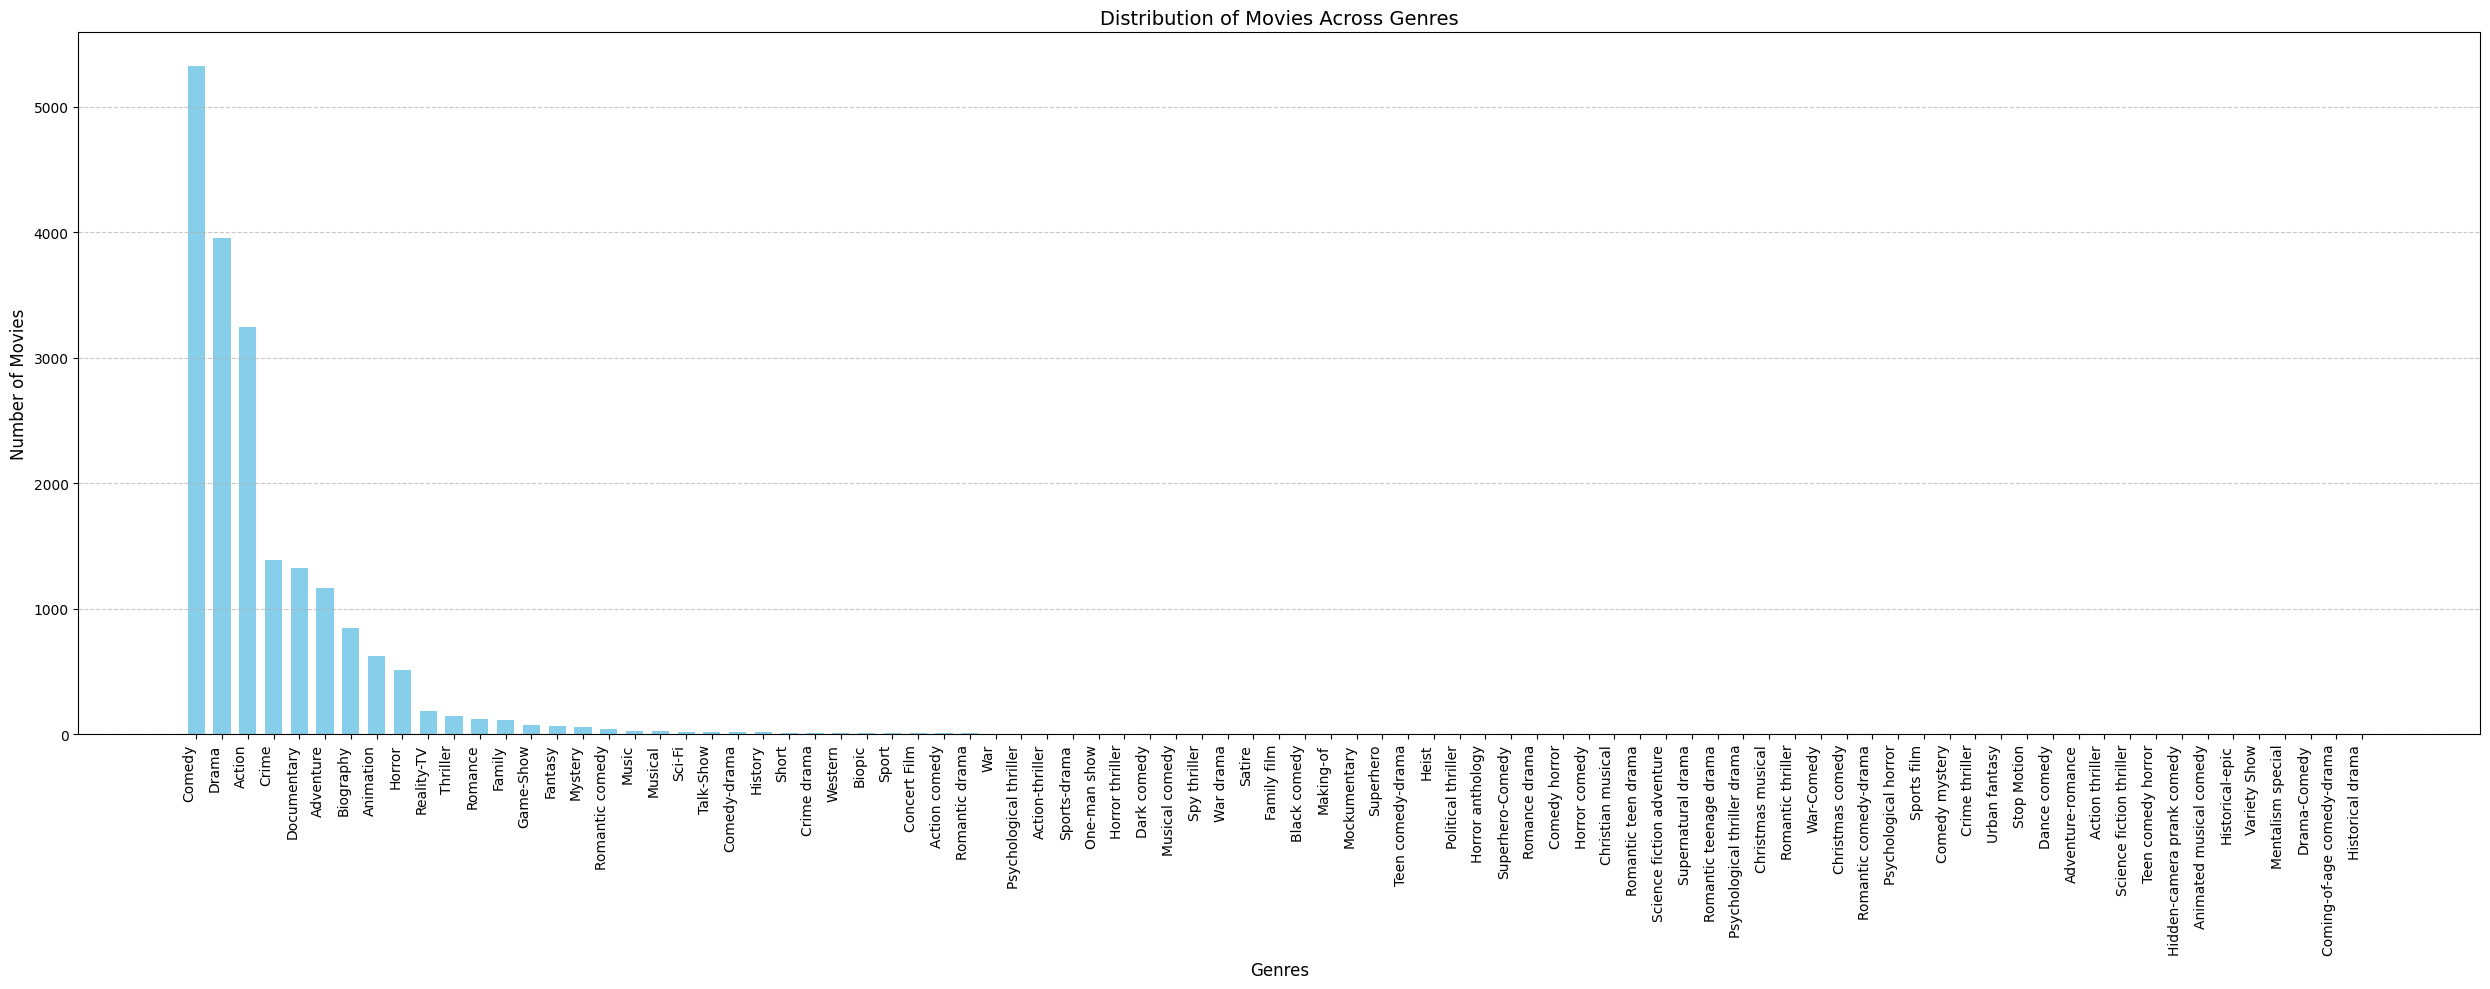

In [28]:
import numpy as np
import matplotlib.pyplot as plt
genre_counts = df_cleaned["Main_Genre"].value_counts()

# Plot the genres
plt.figure(figsize=(25, 10))

# Custom x positions for spaced labels
x_positions = np.arange(len(genre_counts.index)) * 1.5  # Increase spacing

# Create the bar chart
plt.bar(x_positions, genre_counts.values, width=1.0, color='skyblue')  # Bars aligned with custom x positions
plt.xticks(x_positions, genre_counts.index, rotation=90, ha='right')  # Apply the custom positions to labels

# Add labels and title
plt.xlabel("Genres", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.title("Distribution of Movies Across Genres", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

# Show the plot
plt.show()

#4. Cleaning years

In [29]:
df_cleaned["Year"].unique()

array(['1997', '2003', '2005', '1992', '2004', '2000', '1968', '2002',
       '1998', '1996', '1995', '1984', '1981', '1987', '1989', '1999',
       '1994', '1976', '1983', '2001', '1993', '1988', '2008', '2014',
       '1986', '1953', '2006', '1972', '1974', '1991', '2007', '1964',
       '1955', '1956', '1957', '1951', '1975', '2009', '1960', '1950',
       '1963', '1978', '1979', '1982', '1969', '1990', '1966', '1980',
       '1977', '1962', '1985', '1965', '1967', '2012', '1971', '1959',
       '1970', '1961', '2013', '1973', '1952', '2010', '1954', '2011',
       '1948', '1945', '1932', '1942', '1929', '1958', '1937', '1939',
       '1946', '1919', '1943', '1938', '1949', '2021', '1947', '1928',
       '1931', '2020', '2016', '1936', '2017', '2022', '2024', '2023',
       '2018', '2015', '2019', '1920', '1926', '1935', '1918', '1940',
       '1944', '1917', '1934', '1941', '1913', '1923', '1933', '1930',
       '1921', 'August 5, 2019', 'August 21, 2020', 'January 19, 2018',
     

In [30]:
# Step 1: Extract year using regex
df_cleaned["Year"] = df_cleaned["Year"].str.extract(r'(\d{4})')

# Step 2: Convert to integer
df_cleaned["Year"] = df_cleaned["Year"].astype(int)


In [31]:
df_cleaned["Year"].value_counts().sort_index()

Year
1913       1
1917       1
1918       1
1919       2
1920       2
        ... 
2020    1449
2021    1495
2022    1770
2023    1564
2024     983
Name: count, Length: 105, dtype: int64

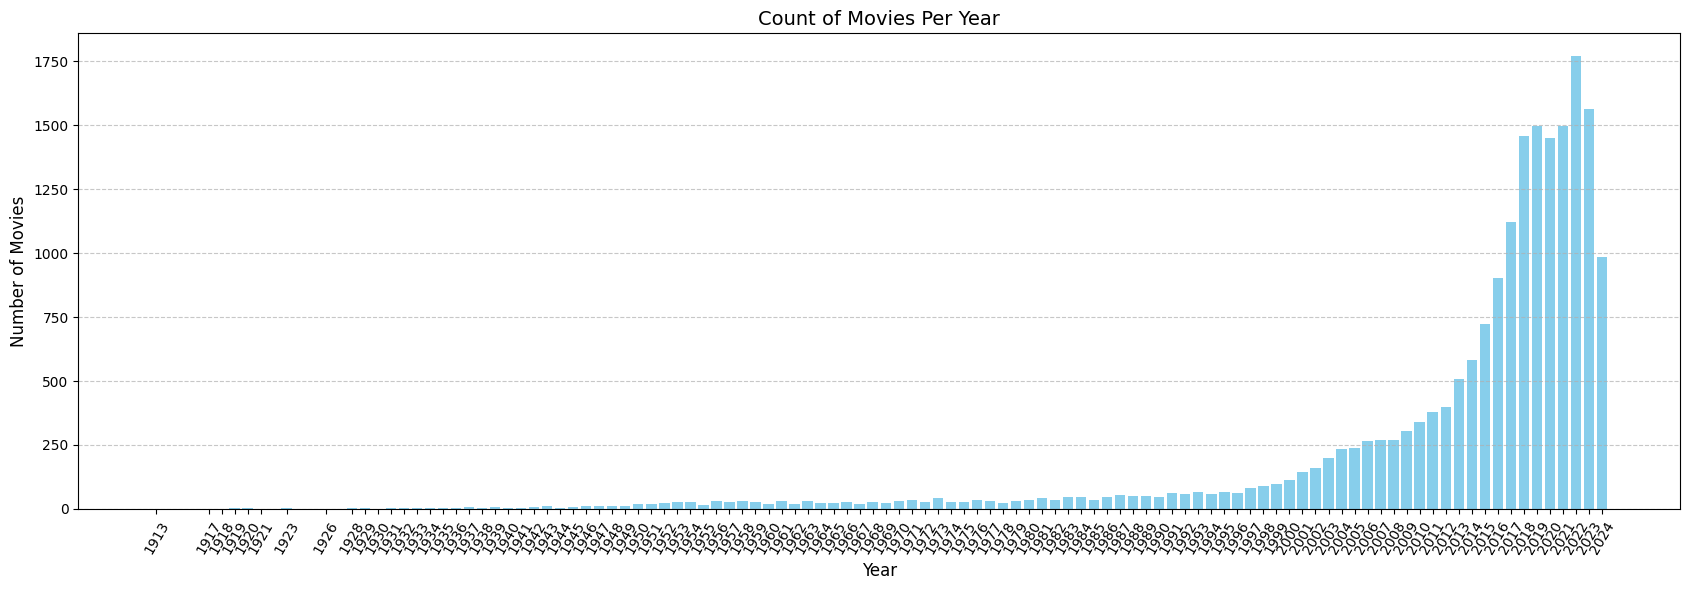

In [32]:
# Count the number of movies per year
movies_per_year = df_cleaned["Year"].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(17, 6))
plt.bar(movies_per_year.index, movies_per_year.values, width=0.8, color='skyblue')
plt.xticks(movies_per_year.index, rotation=60)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.title("Count of Movies Per Year", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [33]:
df_cleaned.isnull().sum()

Title               0
Type_ID             0
Genre_ID            0
Year                0
IMDB_Score          0
Netflix_Original    0
Main_Genre          0
Mapped_Genre_ID     0
dtype: int64

In [34]:
df_cleaned.dtypes

Title                object
Type_ID              object
Genre_ID             object
Year                  int64
IMDB_Score          float64
Netflix_Original       bool
Main_Genre           object
Mapped_Genre_ID       int64
dtype: object

In [35]:
df_cleaned["Type_ID"].unique()

array(['movie', 'tv', 'Undefined'], dtype=object)

In [36]:
types_df = pd.read_csv('C:/.Fichiers/.Révision/.Junior/BI & DBM/BI project/Datasets/Raw/Movie & Ratings/Types.csv')
types_df

,Type_ID,Type
0,0,movie
1,1,tv


In [37]:
# Step 2: Map the main type to the type ID
type_mapping = types_df.set_index("Type")["Type_ID"].to_dict()
type_mapping

{'movie': 0, 'tv': 1}

In [38]:
df_cleaned["Mapped_Type_ID"] = df_cleaned["Type_ID"].map(type_mapping)
df_cleaned

,Title,Type_ID,Genre_ID,Year,IMDB_Score,Netflix_Original,Main_Genre,Mapped_Genre_ID,Mapped_Type_ID
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997,7.6,False,Action,1,0.0
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003,8.2,False,Action,1,0.0
2,Jarhead,movie,"Biography, Drama, War",2005,7.0,False,Biography,16,0.0
3,Unforgiven,movie,"Drama, Western",1992,8.2,False,Drama,35,0.0
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004,8.3,False,Drama,35,0.0
...,...,...,...,...,...,...,...,...,...
19443,Taylor Swift: Reputation Stadium Tour,Undefined,Concert Film,2018,8.4,True,Concert Film,28,NaN
19444,Winter on Fire: Ukraine's Fight for Freedom,Undefined,Documentary,2015,8.4,True,Documentary,34,NaN
19445,Springsteen on Broadway,Undefined,One-man show,2018,8.5,True,One-man show,66,NaN
19446,Emicida: AmarElo - It's All For Yesterday,Undefined,Documentary,2020,8.6,True,Documentary,34,NaN


In [39]:
df_cleaned.dtypes

Title                object
Type_ID              object
Genre_ID             object
Year                  int64
IMDB_Score          float64
Netflix_Original       bool
Main_Genre           object
Mapped_Genre_ID       int64
Mapped_Type_ID      float64
dtype: object

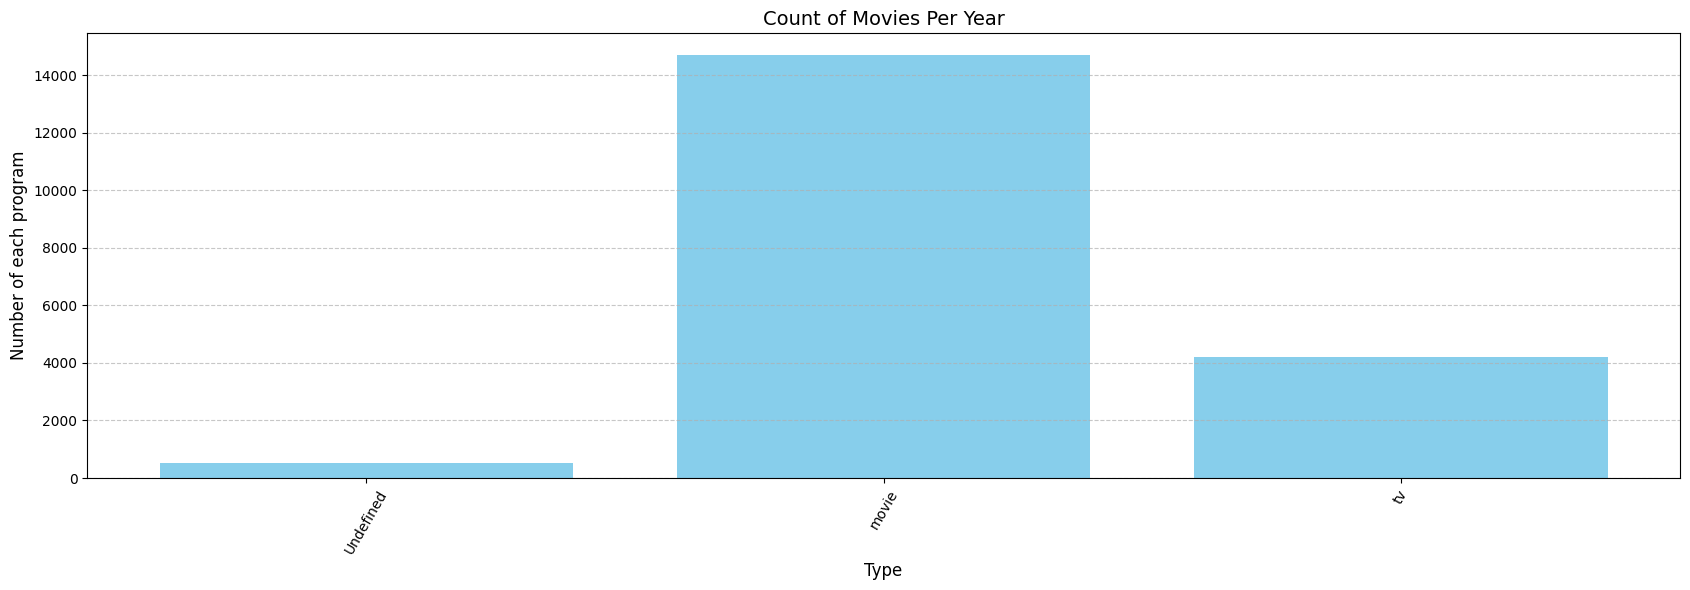

In [40]:
# Count the number of movies per year
program_type = df_cleaned["Type_ID"].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(17, 6))
plt.bar(program_type.index, program_type.values, width=0.8, color='skyblue')
plt.xticks(program_type.index, rotation=60)
plt.xlabel("Type", fontsize=12)
plt.ylabel("Number of each program", fontsize=12)
plt.title("Count of Movies Per Year", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

#5. Export Shows and Ratings


In [51]:
df_cleaned.to_csv('cleaned_Shows_and_Ratings.csv', index=False)

In [1]:
df_cleaned


NameError: name 'df_cleaned' is not defined